<div style="text-align: center;">
    <h1>Credit Card Fraud: Classify on Unbalanced data</h1>
    <img src="https://zdnet2.cbsistatic.com/hub/i/r/2014/11/28/be5ca1a7-76b6-11e4-b569-d4ae52e95e57/resize/770xauto/a1fc0cd4944953755096a9b4cd0ab5a4/credit-card-fraud-can-be-stopped-heres-how.jpg" width="400" height="200">
    <h3 align="center">Made by 🚀 <a href="https://www.kaggle.com/rafanthx13">Rafael Morais de Assis</a></h3>
</div>

<br><br>

**Language:** English (🇺🇸) and Portuguese (🇧🇷)

Created: 2020-08-14; (14/08/2020)

Last updated: 2020-08-14; (14/08/2020)

## References

🇺🇸 : This dataset consists of a thorough understanding of these Kernels ...

🇧🇷 : Este dataset consiste em entender minucioso esses Kernels ...

+ [Fraude de crédito - PTBR](https://www.kaggle.com/olavomendes/fraude-de-cr-dito-ptbr) from [CSD](https://www.kaggle.com/olavomendes)

+ [Credit Fraud  Dealing with Imbalanced Datasets](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets) from [Janio Martinez](https://www.kaggle.com/janiobachmann)

## Kaggle Description

https://www.kaggle.com/mlg-ulb/creditcardfraud

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Goals

🇺🇸
+ Understand data distribution
+ Create a 50/50 "data subsets" with Fraudulent and Non-fraudulent transactions.
+ Determine the classifiers to be used and decide which one is most accurate
+ Create a neural network and compare accuracy with the classifier
+ Understand common errors present in unbalanced data sets.

🇧🇷

+ Entender a distribuição dos dados
+ Criar um "sub-conjuntos de dados" de razão 50/50 com as transações Fraudulentas e Não fraudulentas.
+ Determinar os classificadores a serem usados e decidir qual tem maior acurácia
+ Criar uma rede neural e comparar a acurácia com o clasificador
+ Entender erros comuns presentes em conjuntos de dados desbalanceados.

## Brief Summary of DataSet

**🇺🇸**

**Data Understanding**

With the exception of the *transaction* and *amount* columns, we don't know what the other columns are (for privacy reasons, as stated earlier). The only thing we know about the unknown columns is that they are staggered.

+ Upstream of transactions and relatively small. The average is approximately USD 88
+ There are no null values
+ The vast majority of transactions are non-fraudulent (99.83%), whereas fraudulent transactions occur only in 0.17% of the data set, that is, we have an UNBALANCED dataset.

**Information about the features**

+ PCA: the data description tells us that the "features" have undergone the PCA (Principal Component Analysis) transformation, in order to reduce the dimensions of the data (except time and amount)
+ Scaling: before applying the PCA, the data was scaled.

**🇧🇷**

**Entendendo os dados**

Com exceção das colunas *transaction* e *amount*, não sabemos o que são as outras colunas (por razão de privacidade, como dito anteriormente). A única coisa que sabemos das colunas desconhecidas é que elas estão escalonadas.

+ A montante de transações e relativamente pequena. A média é aproximadamente USD 88
+ Não há valores nulos
+ A grande maioria das transações são não fraudulentas (99.83%), enquanto transações fraudulentas ocorrem apenas em 0.17% do conjunto de dados, ou seja, temos um dataset DESBALANCEADO.

**Informações sobre as "features"**

+ PCA: a descrição dos dados nos diz que as "features" passaram pela transformação PCA (Principal Component Analysis), com intuito de reduzir as dimensões dos dados (exceto time e amount)
+ Escalonamento: antes da aplicação do PCA, os dados foram escalonados.



## Table of Content (TOC) <a id="top"></a>

+ [Import Libs and DataSet](#index01) 
+ [Snippets](#index02)
+ [Understand DataSet](#index03)
+ [Distribution of *Time* and *Amount*](#index04)
+ [Scalling *Time* and *Amount*](#index05)
+ [Split DataSet in Test and Train](#index06)
+ [Random Under-Sampling to correct unbalanced](#index07)
  - [Make Under-Sampling](#index08)
  - [View correlation on balanced dataset](#index09)
  - [Show correlation with *Class* in BoxsPlots](#index10)
  - [Remove Outiliers](#index11)
+ [Dimensionality Reduction and Clustering](#index12)
+ [Train on UnderSampling](#index13)
+ [Test in Original DataFrame Unbalanced](#index14)
+ [Oversampling with SMOTE](#index15)
  - [Create DataSet balanced with SMOTE](#index21)
  - [Test model in UnderSampling DataSet](#index20)
+ [Neural Network](#index16)
  - [UnderSampling - Random](#index17)
  - [OverSampling - SMOTE](#index18)
  - [Others Tests](#index31)
+ [Conclusion: Best Model ...](#index30)

## Import Libs and DataSet <a id ='index01'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, ShuffleSplit, learning_curve, cross_val_predict, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, StratifiedShuffleSplit, cross_val_score

# imblearn
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from collections import Counter
import collections
import os
import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.4f}'.format

df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


## Snippets <a id ='index02'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [2]:
def eda_categ_feat_desc_plot(series_categorical, title = ""):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], row['quantity'], color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [3]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Understand DataSet <a id ='index03'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

**🇺🇸**

284,807 lines, 29 * features * and records classified as class 0 (without fraud) and 1 (fraud), where all resources are dimensioned, except `Time` and` Amount`.

The dataSet is unbalanced. Almost all lines are ** 0 (No Fraud) **.

We must be careful with the evaluation of the model, because if we assume that any transaction is Fraud-Free we get 99% right.
+ If the data as it is used for training, it will hit ** No Fraud ** more and ** ** Fraud ** too much. To solve this, we will use techniques to deal with unbalanced datasets: Random UnderSampling and OverSampling SMOTE.

**🇧🇷**

284.807 linhas, 29 *features* e registros calssificados como a classe 0 (sem fraude) e 1 (fraude), onde todos os recursos são dimensionados, exceto `Time` e` Amount`.

O dataSet está desequilibrado. Quase todas as linhas são **0 (No Fraud)**.

Devemos ter cuidado com a avaliação do modelo, pois se assumirmos que qualquer transação é Sem Fraude acertamos 99%.
+ Se os dados da forma que estão forem usados para treinamento, ele acertará mais o **No Fraud** e errará demais o **Fraud**. Para resolver isso, vamos utilizar técnicas para lidar com datasets desbalanceados: Random UnderSampling e OverSampling SMOTE.

In [4]:
print("Columns List:")
print(list(df.columns))

Columns List:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


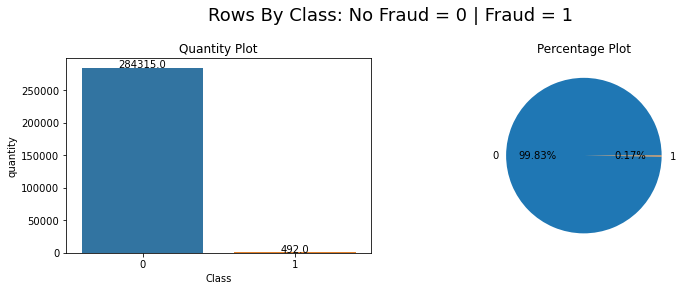

In [5]:
eda_categ_feat_desc_plot(df['Class'], 'Rows By Class: No Fraud = 0 | Fraud = 1')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,"284,807.0000","94,813.8596","47,488.1460",0.0000,"54,201.5000","84,692.0000","139,320.5000","172,792.0000"
V1,"284,807.0000",0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,"284,807.0000",0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,"284,807.0000",-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,"284,807.0000",0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,"284,807.0000",-0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,"284,807.0000",0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,"284,807.0000",-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V8,"284,807.0000",-0.0000,1.1944,-73.2167,-0.2086,0.0224,0.3273,20.0072
V9,"284,807.0000",-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950


<span style='font-size: 16pt'>Missing Data</span> 

**🇺🇸**

No data missing

**🇧🇷**

Sem dados faltando

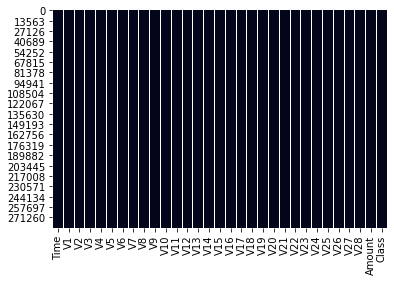

In [7]:
import missingno as msno
sns.heatmap(df.isnull(), cbar=False)

In [8]:
# Good No Null Values!
df.isnull().sum().max()

0

## Distribution of *Time* and *Amount* <a id ='index04'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

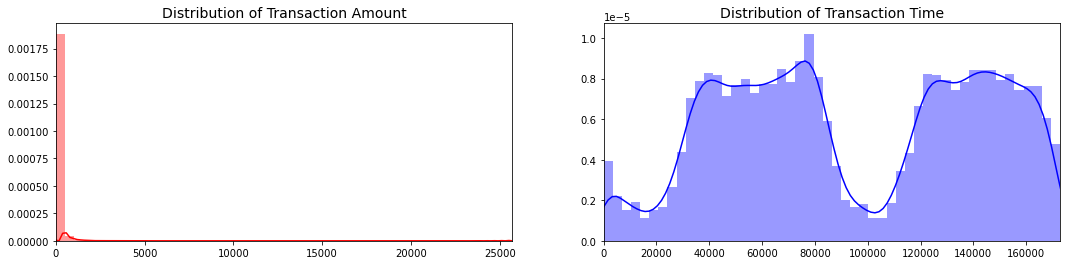

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

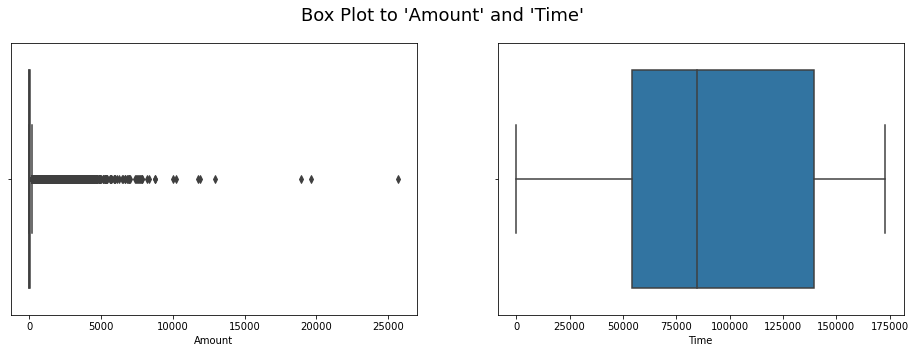

In [10]:
f, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(16, 5), sharex=False)

map_feat_ax = {'Amount': ax1, 'Time': ax2}

for key, value in map_feat_ax.items():
    sns.boxplot(x=df[key], ax=value)
    
f.suptitle("Box Plot to 'Amount' and 'Time'", fontsize=18)
    
plt.show()

In [11]:
# Show Distriupution of Time and Amount

list_columns = ['Amount', 'Time']

list_describes = []
for f in list_columns:
    list_describes.append(df[f].describe())

df_describes = pd.concat(list_describes, axis = 1)
df_describes  

,Amount,Time
count,"284,807.0000","284,807.0000"
mean,88.3496,"94,813.8596"
std,250.1201,"47,488.1460"
min,0.0000,0.0000
25%,5.6000,"54,201.5000"
50%,22.0000,"84,692.0000"
75%,77.1650,"139,320.5000"
max,"25,691.1600","172,792.0000"


## Scalling *Time* and *Amount* <a id='index05'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

🇺🇸

We will scale the columns * time * and * amount * because while the other columns range from values between \[-100, 100 \] these columns range from 0 to extremely high values. In training or ranking, these high values compared to other columns will give these columns more advantage over others, and it may be that there are other columns or combinations of them that influence more.

Then we will scale it so that the "competition between the features" is as fair as possible.

`RobustScaler ()` will be used to reduce the influence of outliers.

🇧🇷

Iremos escalar as colunas *time* e *amount* pois enquanto que as outra colunas vão de valores aproximadamente entre \[-100, 100\] essas colunas vão de 0 a valores extremamente altos. No treinamento ouclassificação, esse valores altos em comparaçâo as outra colunas vão dar mais vantagem a essas colunas sobre as outras, e pode ser que haja outra colunas ou combinação delas que influenciam mais. 

Então iremos escalar para que a "competição entre as features" seja a mais justa possível.

Será utilizado o `RobustScale()` para reduzir a influencia de outiliers.

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler() # Reduce influence of outliers in scaling using IQR (Inter Quartile Range)

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.9950,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,1.7833,0


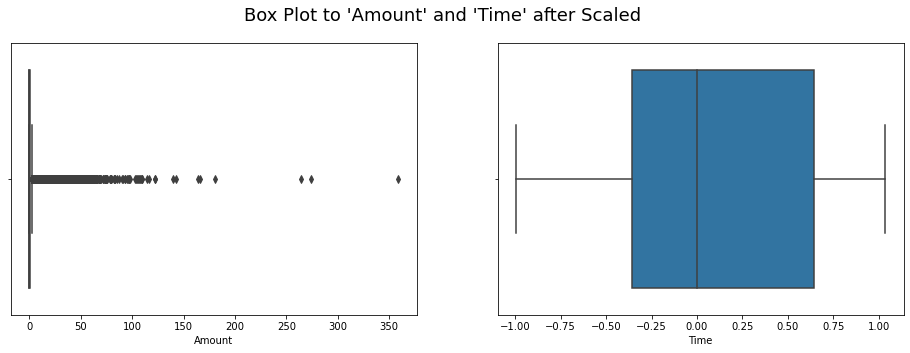

In [13]:
f, (ax1, ax2) = plt.subplots(ncols=2,  figsize=(16, 5), sharex=False)

map_feat_ax = {'Amount': ax1, 'Time': ax2}

for key, value in map_feat_ax.items():
    sns.boxplot(x=df[key], ax=value)
    
f.suptitle("Box Plot to 'Amount' and 'Time' after Scaled", fontsize=18)
    
plt.show()

## Split DataSet in Test and Train <a id='index06'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

<span style='font-size: 15pt'>SubSets with same proportion of Classes</span>

**🇺🇸**

It is necessary to separate the dataset into test and training sets. As the amount of ** Fraud (1) ** is very small, we have to ensure that the two sets have the same proportionality. For this we will use `StratifiedKFold (n_splits = 5)` and we will separate the data with the same record population by class, with the test data being 20% of the dataset and the training data 80%.

The training and test dataset will still be unbalanced each, but with the same proportion of records per class between these datasets.

**🇧🇷**

É necessário separar o dataset em conjuntos de teste e treino. Como a a quantidade de **Fraud (1)** é muito pequena, temos que garantir que os dois conjuntos tenham a mesma proporcionalidade. Para isso usaremos `StratifiedKFold(n_splits=5)` e iremos separar os dados com mesma poporção de registros por classe sendo que os dados de teste serão 20% do dataset e os de treinamento 80%.

Os dataset de treino e testse ainda estarao desbalanceado cada um, mas com mesma proporção de registros por classes entre esses datasets.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

# Separate dataset in train test
X = df.drop('Class', axis=1)
y = df['Class']

# Separa os dados de maneira estratificada (mantendo as proporções originais)
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# De forma iterativa, no final teremos separao 20% para teste e 80% para treinamento
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index].values, X.iloc[test_index].values
    original_ytrain, original_ytest = y.iloc[train_index].values, y.iloc[test_index].values
    
# calculate to check if the 2 sub-set (train,test) have the smae proportion of rows with classes 0 (No fraud) and 1 (fraud)
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
prop_train = train_counts_label/ len(original_ytrain)
prop_test = test_counts_label/ len(original_ytest)
original_size = len(X)

# Print Restult to cofirm that has the same proportion
print("Split DataFrame in Train and Test\n")
print("Original Size:", '{:,d}'.format(original_size))
print("\nTrain: must be 80% of dataset:\n", 
      "X_train:", '{:,d}'.format(len(original_Xtrain)), '{:.2%}'.format(len(original_Xtrain)/original_size),
      "| y_train:", '{:,d}'.format(len(original_ytrain)), '{:.2%}'.format(len(original_ytrain)/original_size),
            "\n => Classe 0 (No Fraud):", train_counts_label[0],  '{:.2%}'.format(prop_train[0]), 
            "\n => Classe 1 (Fraud):   ", train_counts_label[1], '{:.2%}'.format(prop_train[1]),
      "\n\nTest: must be 20% of dataset:\n",
      "X_test:", '{:,d}'.format(len(original_Xtest)), '{:.2%}'.format(len(original_Xtest)/original_size),
      "| y_test:", '{:,d}'.format(len(original_ytest)), '{:.2%}'.format(len(original_ytest)/original_size),
              "\n => Classe 0 (No Fraud)", test_counts_label[0], '{:.2%}'.format(prop_test[0]),
              "\n => Classe 1 (Fraud)   ",test_counts_label[1], '{:.2%}'.format(prop_test[1])
     )

Split DataFrame in Train and Test

Original Size: 284,807

Train: must be 80% of dataset:
 X_train: 227,846 80.00% | y_train: 227,846 80.00% 
 => Classe 0 (No Fraud): 227452 99.83% 
 => Classe 1 (Fraud):    394 0.17% 

Test: must be 20% of dataset:
 X_test: 56,961 20.00% | y_test: 56,961 20.00% 
 => Classe 0 (No Fraud) 56863 99.83% 
 => Classe 1 (Fraud)    98 0.17%


## Random Under-Sampling to correct unbalanced <a id='index07'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

**🇺🇸**

In this step, the "random undersampling" technique will be implemented, which basically consists of removing data to make the data sets more balanced.

The idea is ** EQUALING THE ROWS PROPORTION BY CLASSES BY TAKING ROWS FROM THE CLASS THAT HAS MORE**

That is: Let's take records from the class **No Fraud (0)** which consists of 99% of the original dataset to be the same size as the class **Fraud (1)** which are **492 rows** being less 1% of the data.

!!! Unfortunately there will be a great loss of information but it will have the same proportion of registration per class


**🇧🇷**

Nessa fase será implementada a técnica "random undersampling", que basicamente consiste em remover dados para tornar o conjuntos de dados mais balanceado.

A ideia é **IGUALAR A PROPORÇÃO DE ROWS POR CLASSES TIRANDO ROWS DA CLASSE QUE TEM MAIS**

Ou seja: Vamos tirar registros da classe **No Fraud (0)** que consiste em 99% do dataset original para ficar com mesmo tamanho da classe **Fraud (1)** que são **492 rows** sendo menos de 1% dos dados.  

!!! Infelizmente haverá grande perda de informação mas terá a mesma proporção de registro por classe



### Make Random Under-Sampling <a id='index08'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

🇺🇸

Performing Random UnderSampling: In a random way, we will remove records classified as **No Fraud (0)** so that it has the same amount of class records **Fraud (1)**, that is, until there are 492 records in the training dataset.

<img src="https://miro.medium.com/max/335/1*YH_vPYQEDIW0JoUYMeLz_A.png" width="400" height="200">

🇧🇷

Realizando Random UnderSampling:  De forma aleartória, vamos retirar registros calssificados como **No Fraud (0)** para que tenha a mesma quantidade de registros de classe **Fraud (1)**, ou seja, até que tenha 492 registros no dataset de treino.

In [15]:
# frac = 1 means all data
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1] # df where is class = 1
non_fraud_df = df.loc[df['Class'] == 0][:492] # df where class = 0 (no fraud) limited by coutn masx of fraude 492

# join 2 df to make a datacet balanced
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows to shrunbel y=1 and y=0 (else will bi sorted (thasi is abnormal))
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.shape

(984, 31)

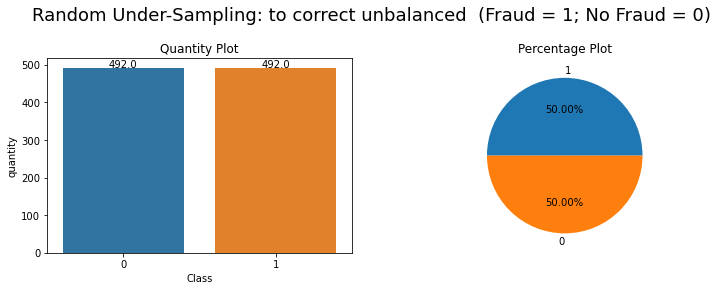

In [16]:
eda_categ_feat_desc_plot(new_df['Class'], 'Random Under-Sampling: to correct unbalanced  (Fraud = 1; No Fraud = 0)')

### View correlation on balanced dataset <a id='index09'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

🇺🇸

Now, having the same proportion of data, we can better analyze the correlation between the variables, since they are all numeric. Below are shown two heatmaps, one from the unbalanced dataframe and the other from the balanced with Under-Sampling.

To make the classification it will be necessary to find a data pattern that characterizes each class. By making the heatmap of balanced data this discrepancy of standards by class will become more evident.

Correlations found:

As it is a case of binary correlation, the heatmap of each feature with class will inform its degree of importance to have a value of 1 **Fraud (1)**. That is, it will inform the level of importance to differentiate between classes 0 and 1.

+ Negative correlation: V16, V14, V12 and V10. That is to say, the lower your values, the more likely the transaction is to be fraudulent

+ Positive correlation: V2, V4, and V11. That is to say, the higher your values, the more likely the transaction is to be fraudulent.

🇧🇷

Agora, tendo a mesma proporção de dado, podemos analisar melhor a correlaçâo entre as variáveis, já que todas são numéricas. A seguir é mostrado dois heatmaps, um do dataframe desbalanceado e outro do balanceado com Under-Sampling.

Para fazer a classificaçâo será necessário encontrar um padrão dos dados que caracterize cada classe. Fazendo o heatmap do dados balanceados essa discrepancia dos padrões por classe ficará mais evidente.

Correlações encontradas:

Como é um caso de correlaçâo binária, o heatmap de cada feature com classe irá informar o seu grau de importância para ter valor 1 **Fraud (1)**. Ou seja, informará o nível de importância para diferenciar entre as classe 0 e 1.

+ Correlação negativa: V16, V14, V12 e V10. Isso que dizer que, quanto menor seus valores, mais provável a transação ser fraudulenta

+ Correlação positiva: V2, V4, e V11. Isso que dizer que, quanto maior seus valores, mais provável a transação ser fraudulenta.

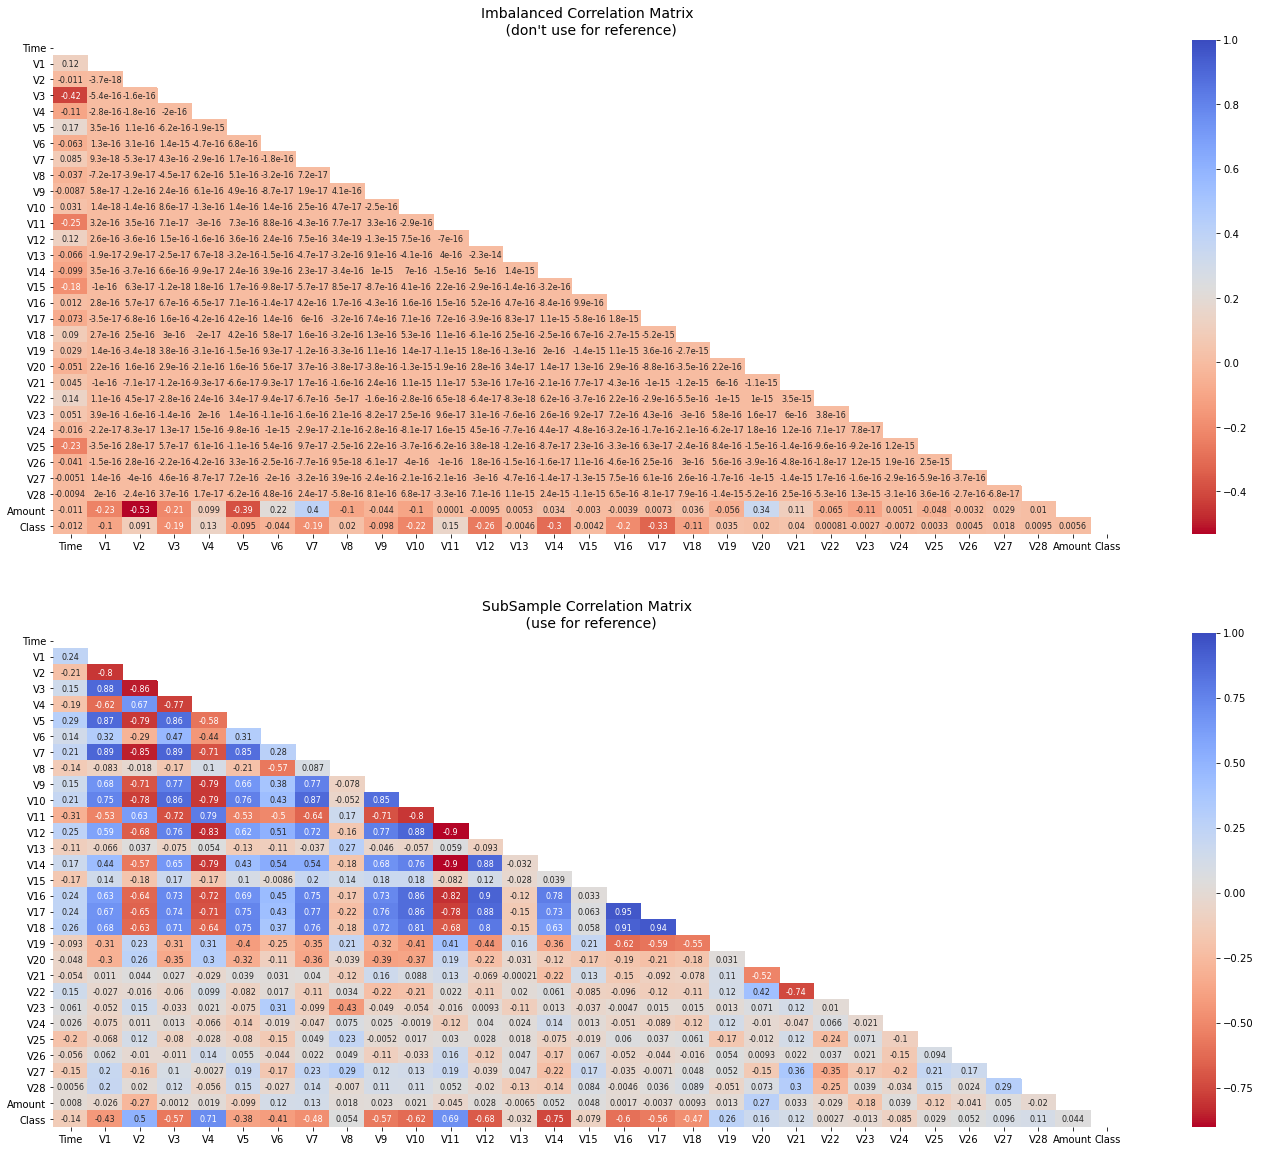

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame (Unbalanced)
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8}, ax=ax1, mask=mask)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# HeatMap to new_df (Balanced)
sub_sample_corr = new_df.corr()

mask = np.zeros_like(sub_sample_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size':8}, ax=ax2, mask=mask)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [18]:
# Generate Ranking of correlations (boht positives, negatives)

corr = new_df.corr() # Show greater correlations both negative and positive
dict_to_rename = {0: "value", "level_0": "feat1", "level_1": "feat2"} # Rename DataFrame
s = corr.unstack().reset_index().rename(dict_to_rename, axis = 1) # Restructure dataframe

s['+|-'] = s['value']
s['value'] = s['value'].abs()

# remove rows thas like 'x' | 'x' 
s_to_drop = s[(s['feat1'] == s['feat2'])].index 
s = s.drop(s_to_drop).reset_index()

s = s[ s['feat1'] == 'Class' ].sort_values(by="value", ascending=False).drop("index", axis=1) 

# Biggest correlation with class
top_int = 10
s.head(top_int)

,feat1,feat2,value,+|-
914,Class,V14,0.7495,-0.7495
904,Class,V4,0.7051,0.7051
911,Class,V11,0.6924,0.6924
912,Class,V12,0.6821,-0.6821
910,Class,V10,0.6234,-0.6234
916,Class,V16,0.6005,-0.6005
903,Class,V3,0.5680,-0.5680
909,Class,V9,0.5654,-0.5654
917,Class,V17,0.5583,-0.5583
902,Class,V2,0.5027,0.5027


### Show correlation with *Class* in BoxsPlots <a id='index10'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

**🇺🇸**

Looking at these 2 boxplots of the same data for different classes on some features, we can see that the patterns differ between classes.

**🇧🇷**

Observando esses 2 boxplots de um mesmo dado para classes diferente sobre algumas features, podmeos perceber que os padrões diferem entre as classes.

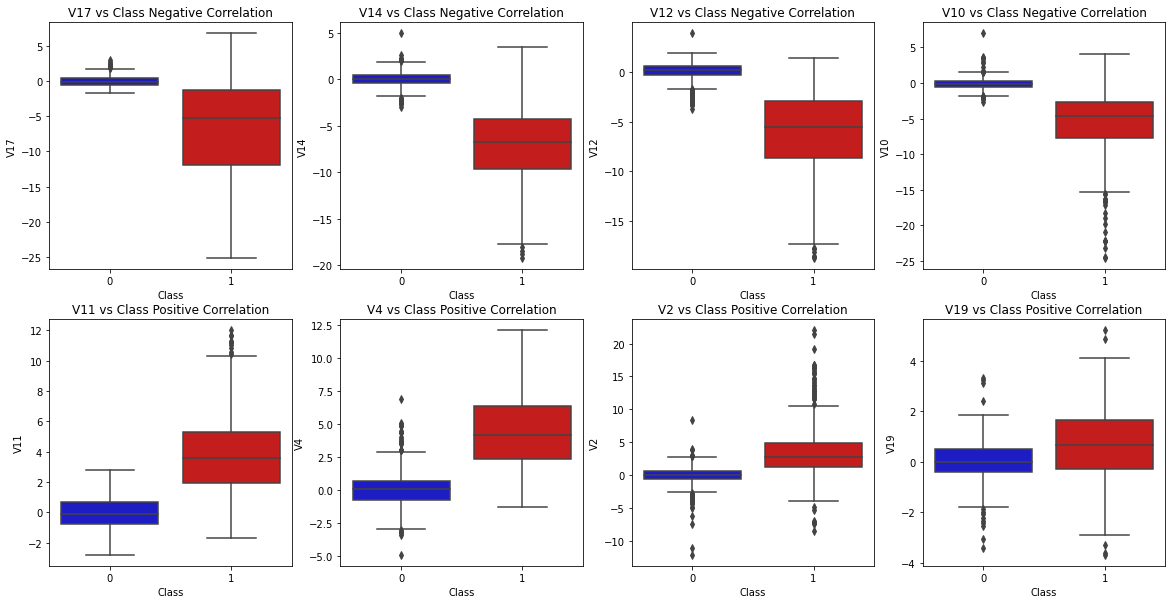

In [19]:
f, (axes, axes2) = plt.subplots(ncols=4, nrows=2, figsize=(20,10))

colors = ["#0101DF", "#DF0101"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes2[0])
axes2[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes2[1])
axes2[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes2[2])
axes2[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes2[3])
axes2[3].set_title('V19 vs Class Positive Correlation')

plt.show()

### Remove Outiliers <a id ='index11'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>


**🇺🇸**


The main objective of this section is to remove extreme outliers from the "features" that have a high correlation with the class.

"Interquartile range" method (interquartile range)

Interquartile range (IQR): The calculation is made by the difference between the 75th percentile and the 25th percentile. With that we can create a threshold between 75º and 25º and any instance outside that threshold will be excluded.

Removing what's outside the IQR is equivalent to keeping 99% of the data

**Removal of "tradeoff" outliers**

We have to be careful about the threshold for removing outliers. We determine this threshold by multiplying a number (1.5, for example) by the IQR. The higher the threshold, the less "outliers" will be detected (If we use the number 3 in the multiplication, for example) and the lower the threshold, the more "outliers" will be detected. It is best to focus only on extreme "outliers", thus decreasing the risk of loss of information, making the model less accurate.


**🇧🇷**

O principal objetivo dessa seção é remover "outliers" extremos das "features" que possuem correlação alta com a classe.

Método "Interquartile range" (distância interquartil)

Interquartile range (IQR): O cálculo é feito pela diferença entre 75º percentil e o 25º percentil. Com isso podemos criar uma limiar entre o 75º e 25º e qualquer instância fora dessa limiar será excluida.

Remover o que está fora do IQR Equivale amanter 99% dos dados

**Remoção de "outliers" "tradeoff"**

Temos que ser cuidadosos com relação à limiar para a remoção de "outliers". Determinamos essa limiar multiplicando um número (1.5, por exemplo) pelo IQR. Quanto maior a limiar, menos "outliers" serão detectados (Se usarmos o número 3 na multiplicação, por exemplo) e quanto menor a limiar, mais "outliers" serão detectados. O melhor é focarmos apenas nos "outliers" extremos, assim diminuindo o risco de ocorrer a perda de informações, fazendo com que o modelo tenha acurácia menor.

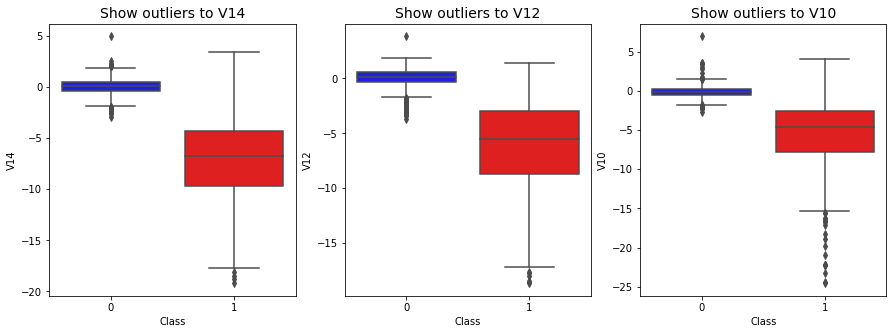

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

colors = ['b', 'r']

# V14
sns.boxplot(x='Class', y='V14', data = new_df, ax=ax1, palette=colors)
ax1.set_title('Show outliers to V14', fontsize=14)

# V12
sns.boxplot(x='Class', y='V12', data = new_df, ax=ax2, palette=colors)
ax2.set_title('Show outliers to V12', fontsize=14)

# V10
sns.boxplot(x='Class', y='V10', data = new_df, ax=ax3, palette=colors)
ax3.set_title('Show outliers to V10', fontsize=14)

plt.show()

In [21]:
# Remover os outliers de V14 (correlação negativa alta com a classe)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
# Valores do quartil 25 e quartil 75
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('QUARTIL 25: {} | QUARTIL 75: {}'.format(q25, q75))
# Interquartile range
v14_iqr = q75 - q25
print('IQR: ', v14_iqr)

# Limiar
v14_cut_off = v14_iqr * 1.5
# Limite superior e inferior
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('LIMIAR: ', v14_cut_off)
print('V14 LIMITE INFERIOR', v14_lower)
print('V14 LIMITE SUPERIOR', v14_upper)

# Ouliers (fora os limites estabelecidos anteriormente)
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 QUANTIDADE DE OUTLIERS EM FRAUDES:', len(outliers))

# Novo dataframe sem os outliers
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 20)


# Remover os outliers de V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 LIMITE INFERIOR: {}'.format(v12_lower))
print('V12 LIMITE SUPERIOR: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]

print('V12 OUTLIERS: {}'.format(outliers))
print('V12 QUANTIDADE DE OUTLIERS EM FRAUDES: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('NÚMERO DE INSTÂNCIAS APÓS A REMOÇÃO DOS OUTLIERS: {}'.format(len(new_df)))
print('----' * 20)


# Remover os outliers de V10

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 LIMITE INFERIOR: {}'.format(v10_lower))
print('V10 SUPERIOR: {}'.format(v10_upper))

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]

print('V10 OUTLIERS: {}'.format(outliers))
print('V10 QUANTIDAADE DE OUTLIERS EM FRAUDES: {}'.format(len(outliers)))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)


print('---' * 20)
print('NÚMERO DE INSTÂNCIAS APÓS A REMOÇÃO DOS OUTLIERS (Antes era 984): {}'.format(len(new_df)))

QUARTIL 25: -9.692722964972385 | QUARTIL 75: -4.282820849486866
IQR:  5.409902115485519
LIMIAR:  8.114853173228278
V14 LIMITE INFERIOR -17.807576138200663
V14 LIMITE SUPERIOR 3.8320323237414122
V14 QUANTIDADE DE OUTLIERS EM FRAUDES: 4
--------------------------------------------------------------------------------
V12 LIMITE INFERIOR: -17.3430371579634
V12 LIMITE SUPERIOR: 5.776973384895937
V12 OUTLIERS: [-18.553697009645802, -18.047596570821604, -18.4311310279993, -18.683714633344298]
V12 QUANTIDADE DE OUTLIERS EM FRAUDES: 4
NÚMERO DE INSTÂNCIAS APÓS A REMOÇÃO DOS OUTLIERS: 975
--------------------------------------------------------------------------------
V10 LIMITE INFERIOR: -14.89885463232024
V10 SUPERIOR: 4.920334958342141
V10 OUTLIERS: [-16.6496281595399, -20.949191554361104, -15.563791338730098, -18.9132433348732, -16.7460441053944, -16.3035376590131, -18.2711681738888, -15.2318333653018, -23.2282548357516, -24.403184969972802, -14.9246547735487, -22.1870885620007, -16.60119696

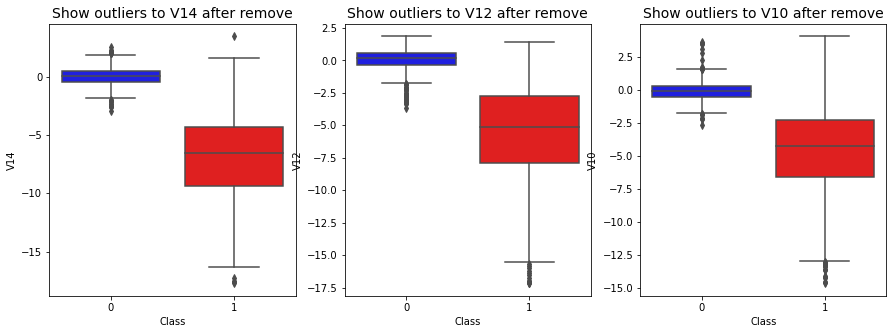

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

colors = ['b', 'r']

# V14
sns.boxplot(x='Class', y='V14', data = new_df, ax=ax1, palette=colors)
ax1.set_title('Show outliers to V14 after remove', fontsize=14)

# V12
sns.boxplot(x='Class', y='V12', data = new_df, ax=ax2, palette=colors)
ax2.set_title('Show outliers to V12 after remove', fontsize=14)

# V10
sns.boxplot(x='Class', y='V10', data = new_df, ax=ax3, palette=colors)
ax3.set_title('Show outliers to V10 after remove', fontsize=14)


plt.show()

## Dimensionality Reduction and Clustering <a id ='index12'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>
 
<span style='font-size: 15pt'>To be able to classify</span>

🇺🇸

Summary:

+ t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset.
+ Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenario (I shuffle the dataset before running t-SNE)
+ **This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.**

🇧🇷

Resumo:

+ O algoritmo t-SNE pode agrupar com precisão os casos de fraude e não fraude em nosso conjunto de dados.
+ Embora a subamostra seja bastante pequena, o algoritmo t-SNE é capaz de detectar clusters com muita precisão em todos os cenários (embaralhe o conjunto de dados antes de executar o t-SNE)
+ **Isso nos dá uma indicação de que outros modelos preditivos terão um bom desempenho na separação de casos de fraude de casos não fraudulentos**.

In [23]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation: Tae a time in comparision with others techniques
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.4 s
PCA took 0.043 s
Truncated SVD took 0.0041 s


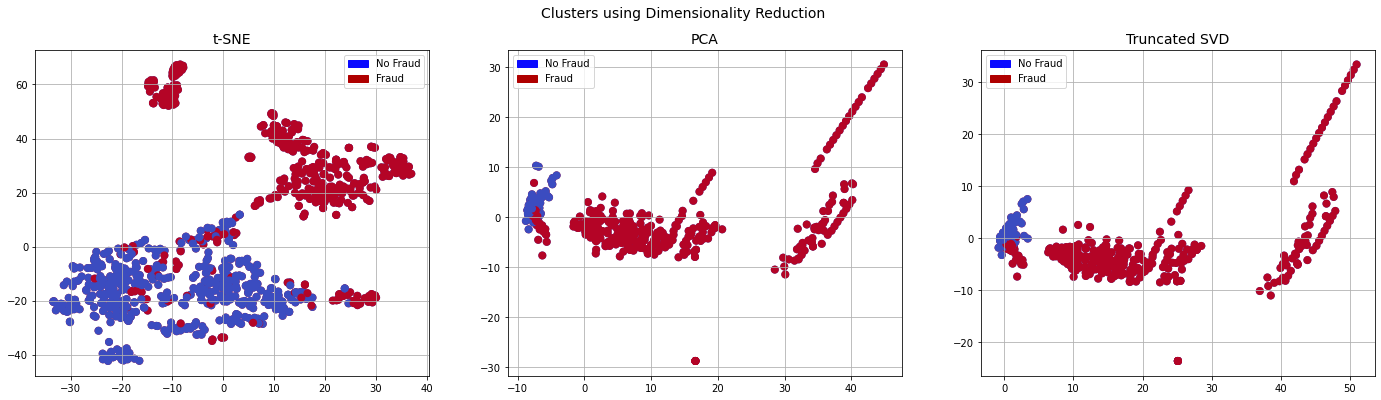

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

# In UnderSampling DataSet Balanced
plt.show()

**Conclusion**

🇺🇸

As we can see from the tsne, it is possible to separate these classes.

🇧🇷

Como podemos observar pelo tsne, é possível separar essas classes.

## Train on UnderSampling Dataset Balanced <a id ='index13'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

🇺🇸

After having a balanced DataSet with the same amount of records per class, we can train a model.

About this small Balanced dataset with about 900 records, we will separate into training and test data.

🇧🇷

Após ter um DataSet balanceado tendo a mesma quantidade de registros por classes, podemos treinar um modelo.

Sobre esse pequeno dataset Balanceado com cerca de 900 registros, vamos separar em dados de treino e teste.



In [25]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [26]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__,
          "\n\tHas a training score of", round(training_score.mean(), 2) * 100, "% accuracy score on ")

Classifiers:  LogisticRegression 
	Has a training score of 94.0 % accuracy score on 
Classifiers:  KNeighborsClassifier 
	Has a training score of 93.0 % accuracy score on 
Classifiers:  SVC 
	Has a training score of 93.0 % accuracy score on 
Classifiers:  DecisionTreeClassifier 
	Has a training score of 89.0 % accuracy score on 


We get that Logistic is the best, now, we make a hyper-turing of params

In [27]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression Best Estimators
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print('Best Loggistic Params:', log_reg)

# KNears best estimator
knears_params = {"n_neighbors": list(range(2,5,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
print('Best KNears Params:', knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
print('Best SVM Params:', svc)

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"],
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
print('Best Tree Params:', tree_clf)

Best Loggistic Params: LogisticRegression(C=1)
Best KNears Params: KNeighborsClassifier(n_neighbors=4)
Best SVM Params: SVC(C=0.9, kernel='linear')
Best Tree Params: DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


Now we use this best params in each classify

In [28]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

from sklearn.metrics import roc_auc_score

print("ROC AUC SCORE\n")

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

print("\nCROSS VALIDATION\n")

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

ROC AUC SCORE

Logistic Regression:  0.9766836841737184
KNears Neighbors:  0.9177040352472202
Support Vector Classifier:  0.9757885166794881
Decision Tree Classifier:  0.9053919854535283

CROSS VALIDATION

Logistic Regression Cross Validation Score:  93.79%
Knears Neighbors Cross Validation Score 92.07%
Support Vector Classifier Cross Validation Score 93.13%
DecisionTree Classifier Cross Validation Score 90.75%


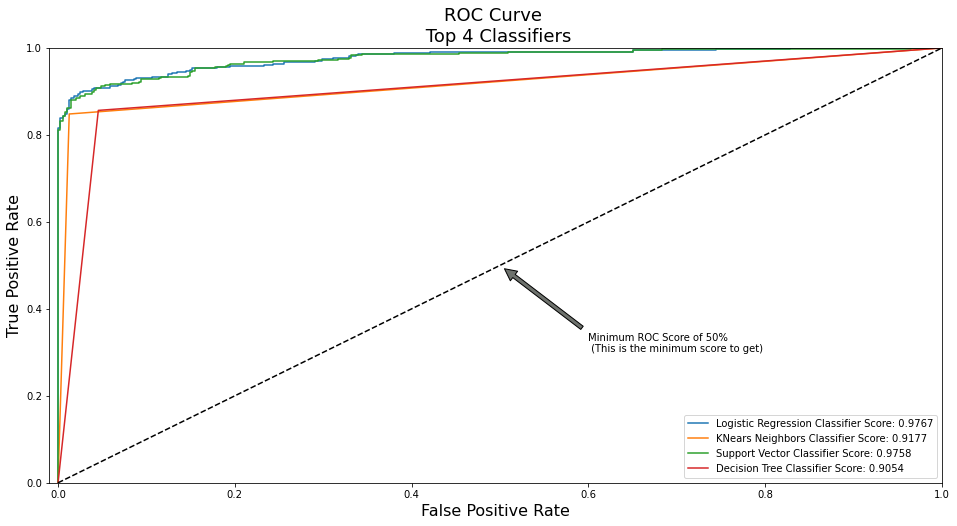

In [29]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

Confusion matrix, without normalization
[[89  6]
 [ 6 89]]


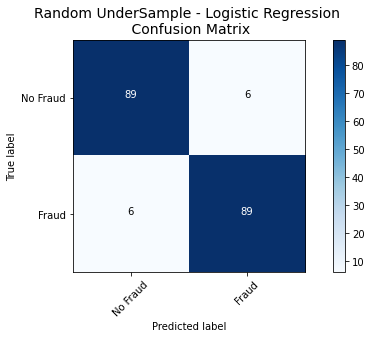

In [30]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test)
y_pred

labels = ['No Fraud', 'Fraud']

confusion_mtx = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(confusion_mtx, labels, title="Random UnderSample - Logistic Regression \n Confusion Matrix")


In [31]:
from sklearn.metrics import classification_report

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

plt.show()

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.94      0.94      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        95
           1       0.98      0.91      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        95
           1       0.93      0.94      0.93        95

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted

<span style='font-size: 15pt'>Conclusion</span>

🇺🇸

Testing in the underSampling test set we have excellent results. But this is a small set, we will now test on all data.

🇧🇷

Testando no conjunto de teste do underSampling tivermos excelentes restultados. Porém esse é um pequeno conjunto, vamos agora testar em todos os dados.


## Test in Original DataFrame Unbalanced <a id ='index14'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

<span style='font-size: 15pt'>After train a model in balanced dataset with UnderSampling method, now we will test in original dataset</span>

🇺🇸

We will use Logistic Regression trained in the balanced dataset by the "Random UnderSampling" method to predict the data from the original dataset.

Realize that, even attending high values **WE ONLY REALIZE THAT IT IS A BIG FAILURE TO ANALYZE PRECISION ABOUT CLASS 1 (FRAUD) AND THEREFORE F1-SCORE**.

🇧🇷

Usaremos a Regressão logística treinada no dataset balanceado pelo método "Random UnderSampling" para prever os dados do dataset original.

Perceba que, mesmo atendendo altos valores **SOMENTE PERCEBEMOS QUE É UMA GRANDE FALHA AO ANALISAR A PRECISION SOBRE A CLASSE 1 (FRAUDE) E CONSEQUENTEMENTE F1-SCORE**. 

In [32]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

# Divide Original DataSet in Train and Test
for train_index, test_index in sss.split(undersample_X, undersample_y):
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

np.unique(undersample_ytrain, return_counts=True), np.unique(undersample_ytest, return_counts=True)

((array([0, 1]), array([227452,    394])),
 (array([0, 1]), array([56863,    98])))

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Com o modelo treinado no undersampling dataset balanced, testamos no ytrain
log_reg_pred = cross_val_predict(log_reg, undersample_Xtrain, undersample_ytrain, cv=5,
                             method="decision_function")

# Perceba, mesmo que tivermos scores altos, em tudo, somente analisando precision na 
print("LOGISTIC REGRESSION\n")

print('ROC AUC SCORE: ', roc_auc_score(undersample_ytrain, log_reg_pred))

log_reg_score = cross_val_score(log_reg, undersample_Xtrain, undersample_ytrain, cv=5)
print('Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

LOGISTIC REGRESSION

ROC AUC SCORE:  0.972146307033621
Cross Validation Score:  99.92%


Confusion matrix, without normalization
[[54665  2198]
 [    4    94]]


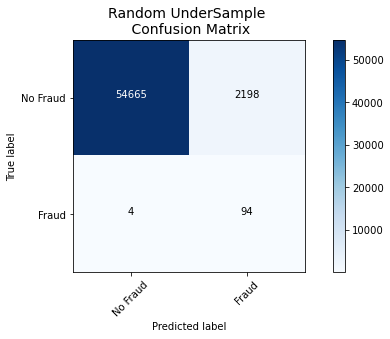

In [34]:
y_pred_log_reg = log_reg.predict(undersample_Xtest)

log_reg_cf = confusion_matrix(undersample_ytest, y_pred_log_reg)

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(log_reg_cf, labels, title="Random UnderSample \n Confusion Matrix")

In [35]:
print('Logistic Regression - Classification Report\n')
print(classification_report(undersample_ytest, y_pred_log_reg))

Logistic Regression - Classification Report

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56863
           1       0.04      0.96      0.08        98

    accuracy                           0.96     56961
   macro avg       0.52      0.96      0.53     56961
weighted avg       1.00      0.96      0.98     56961



<span style='font-size: 15pt'>Conclusion</span>

🇺🇸

Average f1-score of classes: 0.56 (!!!)

The accuracy and f1-score of class 1 (Fraud) is terrible, that is, when the model says it is fraud it makes a lot of mistakes.

If we analyze other metrics, we realize that the model is excellent when in fact it is not, it happens because it is unbalanced.

**The undersampling approach did not work**, perhaps because we lost a lot of information.

🇧🇷

Média do f1-score das classes: 0.56 (!!!)

A precisão e f1-score da classe 1 (Fraude) é terrível, ou seja, quando o modelo diz que é fraude ele erra muito.

Se analisarmos outras métricas, percebmos que o modelo está excelente quando na verdade não está, isso acontece por estar desbalanceado.

**A abordagem undesampling nao deu certo**, talvez, por perdemos muita informação.

## Oversampling with SMOTE <a id ='index15'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

### Create DataSet balanced with SMOTE <a id ='index21'></a>

**🇺🇸**

SMOTE stands for "Synthetic Minority Over-sampling Technique". Unlike random undersampling, SMOTE creates new synthetic points in order to make classes balanced and is one of the alternative techniques for dealing with unbalanced datasets.

+ Resolve class imbalance: SMOTE creates synthetic points for the minority class to achieve a balance between the minority and majority classes
+ Location of synthetic points: SMOTE calculates the distance from the closest neighbors of the minority class and creates synthetic points at these distances
+ Final effect: more information is kept, since we do not need to delete any lines, different from random undersampling.
+ Accuracy / Time tradeoff: although SMOTE is probably more accurate than random undersampling, it will take longer to run.

<img src="https://www.researchgate.net/publication/287601878/figure/fig1/AS:316826589384744@1452548753581/The-schematic-of-NRSBoundary-SMOTE-algorithm.png" width="300" height="200">

**🇧🇷**

SMOTE significa "Synthetic Minority Over-sampling Technique". Ao contrário do "undersampling" aleatório, SMOTE cria novos pontos sintéticos com o intuito de tornar as classes balanceadas e é uma das técnicas alternativas para lidar com datasets desbalanceados.

+ Resolve o desbalanceamento de classes: SMOTE cria pontos sintéticos da classe minoritária para alcançar o balanceamento entre a classe minoritária e majoritária
+ Localização dos pontos sintéticos: SMOTE calcula a distância dos vizinhos mais próximos da classe minoritária e cria pontos sintéticos nessas distâncias
+ Efeito final: mais informações são mantidas, já que não precisamos excluir nenhuma linha ,diferente da undersampling aleatória.
+ Accuracy/Time tradeoff: embora o SMOTE provavelmente seja mais preciso que a "undersampling" aleatória, levará mais tempo para ser executado.

In [36]:
print('Tamanho do X (treino): {} | Tamanho do y (treino): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Tamanho do X (teste): {} | Tamanho do y (teste): {}'.format(len(original_Xtest), len(original_ytest)))

# Lista para armazenar os scores
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Parâmetros da Logistic Regression
log_reg_params = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Randomized SearchCV
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)

# Implementação do SMOTE
# Cross-validation da maneira correta
for train, test in sss.split(original_Xtrain, original_ytrain):
    # Pipeline
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE durante a validação cruzada
    # Treinamento do modelo
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    # Melhores parâmetros
    best_est = rand_log_reg.best_estimator_
    # Predições
    prediction = best_est.predict(original_Xtrain[test])
    
rand_log_reg

Tamanho do X (treino): 227846 | Tamanho do y (treino): 227846
Tamanho do X (teste): 56961 | Tamanho do y (teste): 56961


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=4,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l2']})

Confusion matrix, without normalization
[[54575  2288]
 [   94     4]]


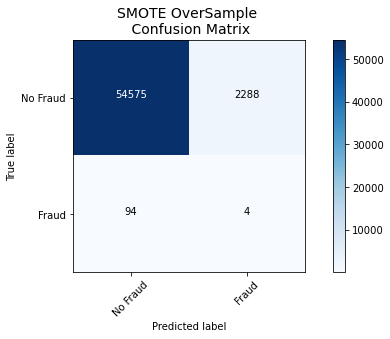

In [37]:
y_pred_best_est_smote = best_est.predict(original_Xtest)

best_est_smote_cf = confusion_matrix(original_ytest, y_pred_log_reg)

labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))
fig.add_subplot(221)

plot_confusion_matrix(best_est_smote_cf, labels, title="SMOTE OverSample \n Confusion Matrix")

In [38]:
# Printa a "classification report"
print(classification_report(original_ytest, y_pred_best_est_smote, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.60     56961
weighted avg       1.00      0.99      0.99     56961



<span style='font-size: 15pt'>Conclusion</span>

🇺🇸

It's already better, improved the FRAUD precision and consequently its f1-score

🇧🇷

Já está melhor, melhorou a precision de FRAUD e consequentemente seu f1-score

### Test model in UnderSampling DataSet <a id ='index20'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

A validação final do modelos modelos de classificação será feita nos dados que passaram pela random undersampling e não nos dados originais.

Vamos comparar o modelo tanto do UnderSampling como OverSampling

In [39]:
y_pred = log_reg.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)
print(classification_report(original_ytest, y_pred, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.97      0.98     56863
       Fraud       0.04      0.90      0.08        98

    accuracy                           0.97     56961
   macro avg       0.52      0.93      0.53     56961
weighted avg       1.00      0.97      0.98     56961



In [40]:
# Logistic Regression com "undersampling" sobre seu dado de test
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression com SMOTE
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

# Dicionário com os scores das duas técnicas (undersampling e oversampling)
d = {
    'Técnica': ['Random undersampling', 'Oversampling (SMOTE)'],
    'Score': [undersample_score, oversample_score]
}

# Cria um dataframe com o dicionário
final_df = pd.DataFrame(data=d)

# Armazena o "Score" em outra variável
score = final_df['Score']
# Remove a coluna "Score"
final_df.drop('Score', axis=1, inplace=True)
# Insere os dados armazenados anteriormente na segunda coluna
final_df.insert(1, 'Score', score)

final_df

,Técnica,Score
0,Random undersampling,0.9368
1,Oversampling (SMOTE),0.9880


<span style='font-size: 15pt'>Conclusion</span>

🇺🇸

The oversamplig technique (SMOTE) obtained a result far superior to the random undersampling technique. This may have occurred due to the fact that during the balance of the data with undersampling it removed several examples of non-fraudulent data, in order that the two classes had an equal number of examples, and this caused a loss of information that could have been useful to the model. SMOTE, on the other hand, did not remove this useful information, but created synthetic points of fraudulent data, that is, the useful information remained present in the data set.

🇧🇷

A técnica de oversamplig (SMOTE) obteve um resultado bem superior à técnica de random undersampling. Isso pode ter ocorrido pelo fato de que durante o balanceamente dos dados com undersampling removeu diversos exemplos de dados não fraudulentos, afim de que as duas classes ficassem com uma quantidade igual de exemplos, e isso ocasionou uma perda de informações que poderiam ter sido úteis ao modelo. Já o SMOTE não removeu essas informações úteis e sim criou pontos sintéticos de dados fraudulentos, ou seja, as informações úteis continuaram presentes no conjunto de dados.

## Neural Network <a id='index16'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

### UnderSampling - Random <a id='index17'></a>

🇺🇸

In this section we will implement a simple neural network (with only one hidden layer) in order to verify that the network performs well in predicting fraudulent and non-fraudulent transactions, in addition to using both types of resampling (undersample and oversample).

In this final test phase, it is important to remember that the model will train with the data using both resampling techniques (random undersampling and oversampling (SMOTE)) and then make the predictions using the original test data.

Creation of the neural network with the "undersampling" technique
This neural network has the following architecture:

+ 1 input layer
+ 1 hidden layer
+ 1 output layer

🇧🇷

Nessa seção implementaremos uma rede neural simples (com apenas uma camada oculta) com intuito de verificar se a rede performa bem na predição de transações fraudulentas e não fraudulentas, além de utilizar os dois tipos de reamostragem (undersample e oversample).

Nessa fase final de teste, é importante lembrar que o modelo treinará com os dados utilizando ambas as técnicas de reamostragem (random undersampling e oversampling (SMOTE)) e depois fará as predições utilizando os dados originais de teste.

Criação da rede neural com a técnica "undersampling"
Essa rede neural possui a seguinte arquitetura:

+ 1 camada de entrada
+ 1 camada oculta
+ 1 camada de saída

In [41]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Tamanho da camada de entrada
n_inputs = X_train.shape[1]

# Criação da rede
undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [42]:
print("Training Dataset generated by RANDOM UnderSampling: Size = ", len(X_train))

undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose = 0)

Training Dataset generated by RANDOM UnderSampling: Size =  757


In [43]:
undersample_fraud_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200)

print("Neural Net KERAS with UnderSampling:\n")
print(classification_report(original_ytest, undersample_fraud_predictions, target_names=labels))

Neural Net KERAS with UnderSampling:

              precision    recall  f1-score   support

    No Fraud       1.00      0.96      0.98     56863
       Fraud       0.04      0.92      0.07        98

    accuracy                           0.96     56961
   macro avg       0.52      0.94      0.53     56961
weighted avg       1.00      0.96      0.98     56961



### OverSampling - SMOTE <a id ='index18'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [44]:
# SMOTE
sm = SMOTE('minority', random_state=42)

# Treina os dados originais utilizando SMOTE
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)
print("Training Dataset generated by SMOTE OverSampling: Size = ", len(Xsm_train))

Training Dataset generated by SMOTE OverSampling: Size =  454904


In [45]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=0)

In [46]:
oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

print("Neural Net KERAS with SMOTE:\n")
print(classification_report(original_ytest, oversample_fraud_predictions, target_names=labels))

Neural Net KERAS with SMOTE:

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.86      0.72      0.78        98

    accuracy                           1.00     56961
   macro avg       0.93      0.86      0.89     56961
weighted avg       1.00      1.00      1.00     56961



### Others Tests <a id='index31'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

In [47]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

In [48]:
from collections import Counter
t0 = time.time()
sm = SMOTEENN("minority", random_state=42)
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)
t1 = time.time()
print("SMOTEENN took {:.6} s".format(t1 - t0)) # 864.109 s = 15minutos

SMOTEENN took 864.109 s


In [49]:
t0 = time.time()
print('Resampled dataset shape BEFORE %s' % Counter(original_ytrain))

print('Resampled dataset shape AFTER %s' % Counter(ysm_train))
t1 = time.time()
print("PRINT took {:.6} s".format(t1 - t0))

Resampled dataset shape BEFORE Counter({0: 227452, 1: 394})
Resampled dataset shape AFTER Counter({1: 227452, 0: 227059})
PRINT took 0.30969 s


In [51]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=0)

# Show Result

oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

print("Neural Net KERAS with SMOTEENN:\n")
print(classification_report(original_ytest, oversample_fraud_predictions, target_names=labels))

Neural Net KERAS with SMOTEENN:

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.78      0.72      0.75        98

    accuracy                           1.00     56961
   macro avg       0.89      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
"""
Neural Net KERAS with SMOTEENN:

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.78      0.72      0.75        98

    accuracy                           1.00     56961
   macro avg       0.89      0.86      0.88     56961
weighted avg       1.00      1.00      1.00     56961
"""

In [52]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from collections import Counter

t0 = time.time()
sm = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
Xsm_train2, ysm_train2 = sm.fit_sample(original_Xtrain, original_ytrain)
t1 = time.time()
print("SMOTETomek took {:.6} s".format(t1 - t0)) # 543.303 s = 9 minutos

SMOTEENN took 543.303 s


In [53]:
n_inputs = Xsm_train2.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

oversample_model.fit(Xsm_train2, ysm_train2, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=0)

# Show Result

oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

print("Neural Net KERAS with SMOTETomek:\n")
print(classification_report(original_ytest, oversample_fraud_predictions, target_names=labels))

Neural Net KERAS with SMOTETomek:

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.90      0.67      0.77        98

    accuracy                           1.00     56961
   macro avg       0.95      0.84      0.89     56961
weighted avg       1.00      1.00      1.00     56961



In [ ]:
"""
Neural Net KERAS with SMOTETomek:

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.90      0.67      0.77        98

    accuracy                           1.00     56961
   macro avg       0.95      0.84      0.89     56961
weighted avg       1.00      1.00      1.00     56961
"""

SMOTEK e SMOTE Obtiveram os melhores resultados

In [50]:
## SMOTEENN
# from collections import Counter
# # Class to perform over-sampling using SMOTE and cleaning using ENN.
# # Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours.
# sm = SMOTEENN("minority", random_state=42)

# # Treina os dados originais utilizando SMOTE
# Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)
# print('Resampled dataset shape %s' % Counter(ysm_train))
# print("Training Dataset generated by SMOTEENN OverSampling: Size = ", len(Xsm_train))

# n_inputs = Xsm_train.shape[1]

# oversample_model = Sequential([
#     Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(2, activation='softmax')
# ])

# oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=0)

# # Show Result

# oversample_fraud_predictions = oversample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

# print("Neural Net KERAS with SMOTEENN:\n")
# print(classification_report(original_ytest, oversample_fraud_predictions, target_names=labels))

## Conclusion: Best Model <a id='index30'></a> <a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white; margin-left: 20px;" data-toggle="popover">Go to TOC</a>

🇺🇸

The best model was to use a Keras neural network training on a dataSet modified by the SMOTE OverSampling method to correct its imbalance.

We achieved great precision in both classes and the average f1-score is now close to 90%.

In this case, the over-sampling approach using SMOTE gave more results than Random under-sampling.

🇧🇷

O melhor modelo foi usar uma rede neural Keras treinando sobre um dataSet alterado pelo método SMOTE de OverSampling para corrigir seu desbalanceamento.

Conseguimos uma grande Precisão nas duas classe e a média de f1-score agora é perto de 90%.

Nesse caso a abordagem de over-sampling usando SMOTE deu mais resultados que Random under-sampling. 